# Библиотеки и настройки

In [13]:
%matplotlib ipympl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SETTINGS_PLOT_WIDTH = 8
SETTINGS_PLOT_HEIGHT = 6

# Входные данные

In [14]:
profiles = ["A", "B", "C", "D", "E", "F", "G", "H", "P", "J", "K"]
x = np.array([4.3, 3.9, 5.0, 4.3, 3.7, 4.4, 3.8, 3.1, 4.7, 4.2, 3.4])
y = np.array([90, 84, 67, 83, 89, 89, 89, 83, 73, 85, 84])

# Линейная и квадратичная регрессия

=== Результаты регрессии ===
   Profile  X (Преподаватели)  Y (Экзамен)  Линейная Y  Квадратичная Y
0        A                4.3           90       81.67           84.95
1        B                3.9           84       84.49           88.48
2        C                5.0           67       76.73           67.18
3        D                4.3           83       81.67           84.95
4        E                3.7           89       85.90           88.44
5        F                4.4           89       80.96           83.31
6        G                3.8           89       85.20           88.61
7        H                3.1           83       90.13           81.09
8        P                4.7           73       78.85           76.60
9        J                4.2           85       82.38           86.28
10       K                3.4           84       88.02           86.12

Ошибки:
1-степенная: MSE = 32.990, SSE = 362.888
2-степенная: MSE = 9.543, SSE = 104.968


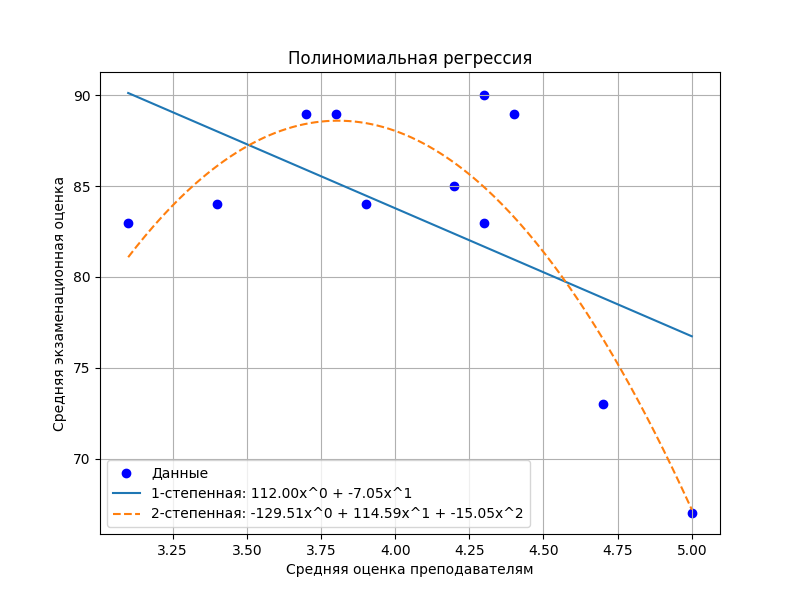

In [15]:
def regression_analysis(x, y, degrees=(1, 2)):
    results = {}
    for deg in degrees:
        coeffs = np.polyfit(x, y, deg)
        poly = np.poly1d(coeffs)
        y_pred = poly(x)

        mse = np.mean((y - y_pred) ** 2)
        sse = np.sum((y - y_pred) ** 2)
        results[deg] = {"poly": poly, "y_pred": y_pred, "mse": mse, "sse": sse}
    return results

def runge_function(x):
    return 1 / (1 + 25 * x**2)

def plot_regression(x, y, results):
    x_line = np.linspace(min(x), max(x), 200)
    plt.figure(figsize=(SETTINGS_PLOT_WIDTH, SETTINGS_PLOT_HEIGHT))
    plt.scatter(x, y, label="Данные", color="blue")
    for deg, res in results.items():
        coeffs = res["poly"].coefficients
        label = (
            f"{deg}-степенная: " + " + ".join([f"{c:.2f}x^{i}" for i, c in enumerate(coeffs[::-1])])
        )
        plt.plot(
            x_line,
            res["poly"](x_line),
            linestyle="--" if deg == 2 else "-",
            label=label
        )
    plt.xlabel("Средняя оценка преподавателям")
    plt.ylabel("Средняя экзаменационная оценка")
    plt.legend()
    plt.title("Полиномиальная регрессия")
    plt.grid()
    plt.show()

def plot_sse_contour_general(x, y, degree=2, coef_indices=(0, 1), grid_size=50):
    coeffs_opt = np.polyfit(x, y, degree)
    coef1_vals = np.linspace(coeffs_opt[coef_indices[0]] - 5, coeffs_opt[coef_indices[0]] + 5, grid_size)
    coef2_vals = np.linspace(coeffs_opt[coef_indices[1]] - 5, coeffs_opt[coef_indices[1]] + 5, grid_size)
    C1, C2 = np.meshgrid(coef1_vals, coef2_vals)
    SSE = np.zeros_like(C1)
    for i in range(grid_size):
        for j in range(grid_size):
            coeffs = coeffs_opt.copy()
            coeffs[coef_indices[0]] = C1[i, j]
            coeffs[coef_indices[1]] = C2[i, j]
            y_pred = np.polyval(coeffs, x)
            SSE[i, j] = np.sum((y - y_pred) ** 2)

    plt.figure(figsize=(SETTINGS_PLOT_WIDTH, SETTINGS_PLOT_HEIGHT))
    contour = plt.contourf(C1, C2, SSE, levels=30, cmap="viridis")
    plt.colorbar(contour, label="SSE")
    plt.scatter([coeffs_opt[coef_indices[0]]], [coeffs_opt[coef_indices[1]]],
                color="red", marker="x", s=100, label="Оптимум")
    plt.xlabel(f"Коэффициент {coef_indices[0]}")
    plt.ylabel(f"Коэффициент {coef_indices[1]}")
    plt.title(f"Контур SSE для полинома степени {degree}")
    plt.legend()
    plt.show()

reg_results = regression_analysis(x, y, degrees=(1, 2))
df_reg = pd.DataFrame({
    "Profile": profiles,
    "X (Преподаватели)": x,
    "Y (Экзамен)": y,
    "Линейная Y": reg_results[1]["y_pred"].round(2),
    "Квадратичная Y": reg_results[2]["y_pred"].round(2)
})
print("=== Результаты регрессии ===")
print(df_reg)
print("\nОшибки:")
for deg, res in reg_results.items():
    print(f"{deg}-степенная: MSE = {res['mse']:.3f}, SSE = {res['sse']:.3f}")

plot_regression(x, y, reg_results)
# plot_sse_contour_general(x, y, degree=2)

# Аппроксимация функции Рунге

Коэффициенты для степени  5: [ 3.85407480e-17  7.62515528e-02 -1.09610692e-16 -3.93321087e-01
  4.64439613e-17  4.24128582e-01]
Коэффициенты для степени  6: [-6.52020214e-02  8.76812828e-17  4.65770122e-01  2.41969889e-16
 -9.57932920e-01  2.24406910e-17  5.40209975e-01]

=== Приближение функции Рунге ===
       X  Runge f(x)  Полином 5 ст.  Полином 6 ст.
0  -2.00     0.00990        0.07087       -0.01213
1  -1.71     0.01343       -0.07321        0.09278
2  -1.43     0.01922       -0.06099       -0.02906
3  -1.14     0.02971        0.04048       -0.06167
4  -0.86     0.05163        0.17632        0.06198
5  -0.57     0.10913        0.30383        0.27481
6  -0.29     0.32886        0.39253        0.46508
7   0.00     1.00000        0.42413        0.54021
8   0.29     0.32886        0.39253        0.46508
9   0.57     0.10913        0.30383        0.27481
10  0.86     0.05163        0.17632        0.06198
11  1.14     0.02971        0.04048       -0.06167
12  1.43     0.01922       -0.

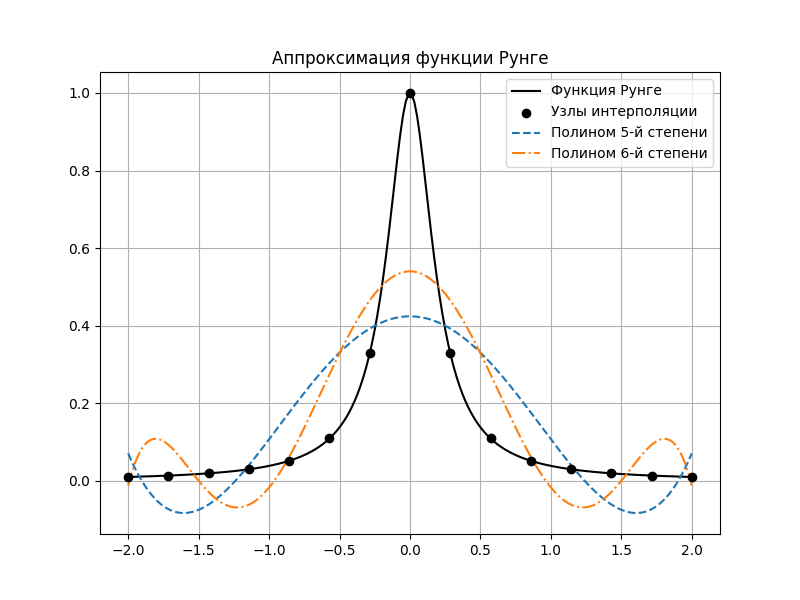

In [16]:
def runge_approximation(n_points=15, degrees=(5, 6)):
    X = np.linspace(-2, 2, n_points)
    Y = runge_function(X)
    results = {}
    for deg in degrees:
        coeffs = np.polyfit(X, Y, deg)
        print(f"Коэффициенты для степени  {deg}:", coeffs)
        poly = np.poly1d(coeffs)
        Y_pred = poly(X)
        mse = np.mean((Y - Y_pred) ** 2)
        sse = np.sum((Y - Y_pred) ** 2)
        results[deg] = {"poly": poly, "Y_pred": Y_pred, "mse": mse, "sse": sse}
    return X, Y, results

def plot_runge(X, Y, results):
    x_plot = np.linspace(-2, 2, 200)
    plt.figure(figsize=(SETTINGS_PLOT_WIDTH, SETTINGS_PLOT_HEIGHT))
    plt.plot(x_plot, runge_function(x_plot), "k-", label="Функция Рунге")
    plt.scatter(X, Y, color="black", zorder=5, label="Узлы интерполяции")
    for deg, res in results.items():
        plt.plot(x_plot, res["poly"](x_plot), linestyle="--" if deg == 5 else "-.",
                 label=f"Полином {deg}-й степени")
    plt.legend()
    plt.title("Аппроксимация функции Рунге")
    plt.grid()
    plt.show()

X_runge, Y_runge, runge_results = runge_approximation()
df_runge = pd.DataFrame({
    "X": X_runge.round(2),
    "Runge f(x)": Y_runge.round(5),
    "Полином 5 ст.": runge_results[5]["Y_pred"].round(5),
    "Полином 6 ст.": runge_results[6]["Y_pred"].round(5)
})
print("\n=== Приближение функции Рунге ===")
print(df_runge)
print("\nОшибки:")
for deg, res in runge_results.items():
    print(f"Полином {deg}-й ст.: MSE = {res['mse']:.6f}, SSE = {res['sse']:.6f}")

plot_runge(X_runge, Y_runge, runge_results)